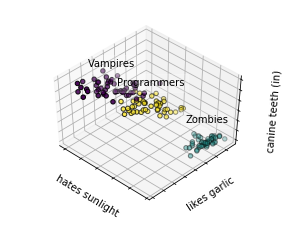

In [3]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np 

from os.path import join, dirname, abspath
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

%matplotlib inline
iris = datasets.load_iris()

x = iris.data
y = iris.target

fignum = 1

# Plot the ground truthd

fig = plt.figure(fignum, figsize=(4, 3))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Zombies', 0),
                    ('Programmers', 1),
                    ('Vampires', 2)]:
    ax.text3D(x[y == label, 3].mean(),
              x[y == label, 0].mean(),
              x[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results

y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('hates sunlight')
ax.set_ylabel('likes garlic')
ax.set_zlabel('canine teeth (in)')

ax.set_title('')
ax.dist = 12

# Add code here:
# plt.show()

In [8]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

samples = iris.data # (150, 4)

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y))) # (150, 2)
# Step 1: Place K random centroids

k = 3

centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)))#(3, 2)

# Step 2: Assign samples to nearest centroid

# Distance formula

def distance(a, b):
  one = (a[0] - b[0]) **2
  two = (a[1] - b[1]) **2
  distance = (one+two) ** 0.5
  return distance

# Cluster labels for each point (either 0, 1, or 2)

labels = np.zeros(len(samples))

# Distances to each centroid

distances = np.zeros(k)

# Assign to the closest centroid

for i in range(len(samples)):
  distances[0] = distance(sepal_length_width[i], centroids[0])
  distances[1] = distance(sepal_length_width[i], centroids[1])
  distances[2] = distance(sepal_length_width[i], centroids[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# Print labels

print(labels)

(150, 2)
[1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2.
 1. 2. 0. 0. 0. 1. 0. 1. 0. 2. 0. 2. 2. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 0. 2. 1. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1.]
